# Making a data file full of random nubmers

Just run this part so we know the data file exists!

In [55]:
import numpy as np
# make some random data
a = np.random.normal(loc=0, scale=1, size=1000)

In [56]:
# Save it to a file
with open('random_data.csv', 'w') as f:
    print("numbers", file=f)
    for i in a:
        print(i,file=f)

# Plotting code

We have a code that reads that one file, and then plots the result to a new file. We put it into a function because we were told that functions are for good people.

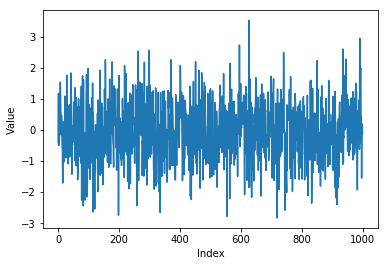

In [54]:
from matplotlib import pyplot
import scipy
import scipy.ndimage

def plot():
    """
    Read a data file and plot it to another file.
    """
    tab = Table.read('random_data.csv')
    data = tab['numbers']
    smoothed = scipy.ndimage.gaussian_filter1d(data, sigma=2)
    
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(a)
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    pyplot.savefig('NicePlot.png')
    pyplot.show()
    return

plot()

# Questions:

If I want to use a different data set (maybe something that's not random junk), what do I need to change?

If I want to save the file to a different location or use a different name, what do I need to change?

If I have 10 input files, how to I automate reading all the data and saving all the figures?

---

The problem is that the 'data' is embedded in the code. Here I mean the filenames, not the list of numbers. At least we didn't think copying the big array of numbers directly into our script was a good idea.

How about we make the input/output filenames arguments to the function?

In [57]:
def plot(infile, outfile):
    """
    Read a data file and plot it to another file.
    
    Parameters
    ----------
    infile : string
        The input filename. Something that astropy.Table can read. 
        Assumed to have a column called 'numbers' that we are going to plot.
        
    outfile : string
        The output filename. Should be .png or something that matplotlib
        knows how to write
    """
    tab = Table.read(infile)
    data = tab['numbers']
    smoothed = scipy.ndimage.gaussian_filter1d(data, sigma=2)
    
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(a)
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    pyplot.savefig(outfile)
    return

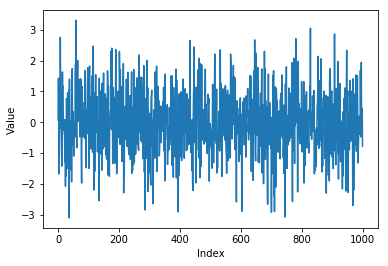

In [58]:
plot(infile='random_data.csv',
     outfile='NicePlot.png')

# Solved ?
Now we can use our `if __main__` clause to do this for 10 different input files, just by calling this one function lots of times. But we still have to edit our script to change the input/output filenames... :(

For a jupyter notebook this isn't such a worry, we have access to the notebook code just to run it. However if we have a stand alone `.py` file we would normally run it via `python script.py` or `./script.py`. What we would really like is to pass the filenames to the script from the command line !

This can be done by looking at the arguments being passed.

In [59]:
import sys

if __name__ == "__main__":
    # check we have exactly three arguments otherwise show the help 
    if len(sys.argv) != 3:
        print("usage: script.py <infile> <outfile>")
        print("  Will read data column 'numbers' of <infile>")
        print("  and plot results into outfile.")
        sys.exit() # quit python here
        
    # run code normally since we know we have the required number of arguments
    infile = sys.argv[1]
    outfile = sys.argv[2]
    plot(infile=infile,
         outfile=outfile)

FileNotFoundError: [Errno 2] No such file or directory: '-f'

# NB

The above will work in a script, but in a jupyter notebook the `sys.argv` will be filled with whatever commands werer used to start the notebook.

# More advanced

You can use the builtin `argparse` module to make your command line interface a *lot* easier to use and maintain. It's very powerful and you should check out https://docs.python.org/3/library/argparse.html to get started